In [64]:
import matplotlib
import os

# Matplotlib 폰트 캐시 경로 확인
cache_path = matplotlib.get_cachedir()
print(cache_path)  # 캐시 경로 확인

# 캐시 파일 삭제
font_cache_file = os.path.join(cache_path, 'fontlist-v330.json')  # 버전에 따라 파일명이 달라질 수 있음
if os.path.exists(font_cache_file):
    os.remove(font_cache_file)
    print("폰트 캐시 삭제 완료")
else:
    print("폰트 캐시 파일이 존재하지 않음")


/root/.cache/matplotlib
폰트 캐시 파일이 존재하지 않음


In [65]:
# 나눔 폰트 설치 / 한글 깨짐 방지 , 런타임 다시 시작하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import requests

import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='NanumGothic') #matplotlib 한글 깨짐 방지

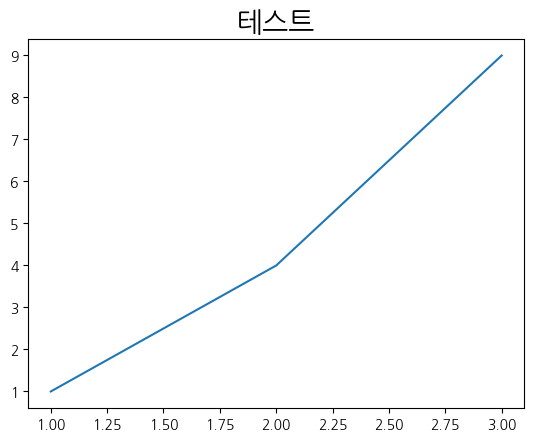

In [2]:
plt.plot([1,2,3],[1,4,9])
plt.title("테스트", fontsize=20)
plt.show()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 로드

In [4]:
raw_news_1 = pd.read_excel('/content/drive/MyDrive/2025-2/TAVE/뉴스 카테고리 분류 프로젝트/data/NewsResult_20241003-20241231.xlsx')
raw_news_2 = pd.read_excel('/content/drive/MyDrive/2025-2/TAVE/뉴스 카테고리 분류 프로젝트/data/NewsResult_20250101-20250331.xlsx')
raw_news_3 = pd.read_excel('/content/drive/MyDrive/2025-2/TAVE/뉴스 카테고리 분류 프로젝트/data/NewsResult_20250401-20250701.xlsx')
raw_news_4 = pd.read_excel('/content/drive/MyDrive/2025-2/TAVE/뉴스 카테고리 분류 프로젝트/data/NewsResult_20250702-20251002.xlsx')

데이터 합치기

In [5]:
raw_news_list = [raw_news_1, raw_news_2, raw_news_3, raw_news_4]

target_columns = ['일자', '제목', '통합 분류1']

filtered_news_list = [df[target_columns] for df in raw_news_list]

raw_news = pd.concat(filtered_news_list, ignore_index=True)

raw_news.head(2)

,일자,제목,통합 분류1
0,20241231,"경주 ‘봉황알 고분’은 1524년전 정변의 기록 5살 왕자, 이사지왕은 누구?[이기...",문화>학술_문화재
1,20241231,SF영화 단골 메뉴 XR 일본보다 아래인 한국[경제밥도둑],IT_과학>모바일


전처리

In [6]:
raw_news['일자'] = pd.to_datetime(raw_news['일자'], errors='coerce')

raw_news['카테고리'] = raw_news['통합 분류1'].astype(str).str.split('>').str[0].str.strip()

raw_news = raw_news[raw_news['카테고리'] != '지역']

df = raw_news[["일자","제목","카테고리"]]

In [7]:
df = pd.read_csv('/content/drive/MyDrive/2025-2/TAVE/뉴스 카테고리 분류 프로젝트/data/news.csv')

# EDA

In [8]:
df

,일자,제목,카테고리
0,20250101,"윤석열, 관저 앞 지지자들에 “끝까지 싸울 것” 편지 보내",정치
1,20250101,휴전 난항에 폭우까지 차디찬 가자의 새해,국제
2,20250101,미국 새해맞이 인파 향해 트럭 돌진 총기 발사 40여명 사상,국제
3,20250101,푸틴 “모든 게 잘될 거라 확신 ”전쟁 경제난 빠진 러 신년사,국제
4,20250101,이시바 “국제 정세 엄중 외교 방위 두 축으로 국익 지킬 것”,국제
...,...,...,...
65329,20250715,“보조금 얼마면 돼” 가입자 쟁탈전 ‘후끈’ SKT 위약금 면제 마지막날 가본 ‘성지’,IT_과학
65330,20250715,너도나도 손드는 ‘스테이블 코인’ ‘좋은 화폐’가 될 수 있을까,경제
65331,20250715,"[단독]“전광훈 모른다”던 ‘리박스쿨’ 손효숙, 전광훈 집회 광고 제작 정황 청문...",문화
65332,20250715,"‘인천 맨홀 사고’ 의식불명 5남매 아빠, 장기 나눠주고 끝내 하늘로",사회


기본 정보 확인

In [9]:
print("=" * 50)
print("1. 데이터 기본 정보")
print("=" * 50)
print(f"전체 데이터 수: {len(df):,}개")
print(f"\n데이터 타입:\n{df.dtypes}")
print(f"\n결측치:\n{df.isnull().sum()}")
print(f"\n중복 데이터: {df.duplicated().sum()}개")

1. 데이터 기본 정보
전체 데이터 수: 65,334개

데이터 타입:
일자       int64
제목      object
카테고리    object
dtype: object

결측치:
일자      0
제목      0
카테고리    0
dtype: int64

중복 데이터: 65개


In [10]:
print("=" * 50)
print("1.1 중복 데이터 상세 확인 (수정)")
print("=" * 50)

# 1. 중복 확인에 사용할 컬럼 리스트 정의
# 토큰화 결과로 추가된 리스트 형태의 컬럼(tokens, input_ids 등)을 제외합니다.
# 원래 데이터의 핵심 컬럼인 '일자', '제목', '카테고리'만 사용합니다.
CHECK_COLUMNS = ['일자', '제목', '카테고리']

# 2. 지정된 컬럼을 기준으로 중복되는 모든 행을 True로 표시
# df[CHECK_COLUMNS]를 기준으로 duplicated를 수행합니다.
# keep=False는 중복되는 모든 행을 True로 반환합니다.
is_duplicate = df.duplicated(subset=CHECK_COLUMNS, keep=False)
duplicate_rows = df[is_duplicate]

print(f"✅ 중복으로 식별된 데이터 쌍의 총 행 수: {len(duplicate_rows):,}개")

# 3. 중복 데이터 샘플 출력
if not duplicate_rows.empty:
    print("\n📦 중복 데이터 샘플 (제목 및 일자 기준으로 정렬):")
    display_cols = ['일자', '제목', '카테고리']

    # 제목 순으로 정렬하여 쌍을 이루는 데이터가 붙어 보이도록 합니다.
    # .head(20)으로 출력 개수를 제한하여 가독성을 높입니다.
    # to_markdown(index=False)를 사용하여 깔끔하게 출력합니다.
    print(duplicate_rows.sort_values(by=['제목', '일자']).head(20)[display_cols].to_markdown(index=False))
else:
    print("중복 데이터가 존재하지 않습니다.")

1.1 중복 데이터 상세 확인 (수정)
✅ 중복으로 식별된 데이터 쌍의 총 행 수: 128개

📦 중복 데이터 샘플 (제목 및 일자 기준으로 정렬):
|     일자 | 제목                                                                             | 카테고리   |
|---------:|:---------------------------------------------------------------------------------|:-----------|
| 20250109 | 12월 KBS 시청자위원회 회의록, 이것은 영원히 남을 비웃음거리다[위근우의 리플레이] | 사회       |
| 20250109 | 12월 KBS 시청자위원회 회의록, 이것은 영원히 남을 비웃음거리다[위근우의 리플레이] | 사회       |
| 20250717 | 22일부터 단통법 폐지...휴대전화 보조금 상한선 사라진다                           | 경제       |
| 20250717 | 22일부터 단통법 폐지...휴대전화 보조금 상한선 사라진다                           | 경제       |
| 20250522 | 5월 ‘반짝 더위’ 폭염 징후 아니었다                                               | 사회       |
| 20250522 | 5월 ‘반짝 더위’ 폭염 징후 아니었다                                               | 사회       |
| 20241001 | 60년간 영화에서 ‘어머니’역 원로배우 전숙씨 별세                                  | 문화       |
| 20241001 | 60년간 영화에서 ‘어머니’역 원로배우 전숙씨 별세                                  | 문화       |
| 20250302 | BTS 제이홉 “

In [11]:
print("=" * 50)
print("1.2 중복 데이터 제거 및 결과 확인")
print("=" * 50)

# 1. 중복 제거 전 데이터 크기 확인
initial_count = len(df)
print(f"  - 제거 전 데이터 수: {initial_count:,}개")

# 2. '일자', '제목', '카테고리' 컬럼을 기준으로 중복 행 제거
# keep='first'는 첫 번째로 등장한 행을 남기고 나머지를 제거합니다.
# inplace=True로 원본 데이터프레임 df를 바로 수정합니다.
# ⚠️ 주의: subset 인자를 명시해야 토큰화된 리스트 컬럼 때문에 발생하는 TypeError를 방지할 수 있습니다.
df.drop_duplicates(subset=['일자', '제목', '카테고리'], keep='first', inplace=True)

# 3. 중복 제거 후 결과 확인
removed_count = initial_count - len(df)
print(f"✅ 중복 데이터 제거 완료!")
print(f"  - 제거된 중복 데이터 수: {removed_count:,}개")
print(f"  - 최종 데이터 수: {len(df):,}개")

1.2 중복 데이터 제거 및 결과 확인
  - 제거 전 데이터 수: 65,334개
✅ 중복 데이터 제거 완료!
  - 제거된 중복 데이터 수: 65개
  - 최종 데이터 수: 65,269개


카테고리 분석


2. 카테고리 분석
카테고리
정치       16977
사회       15764
경제       11519
국제        9343
문화        6157
IT_과학     3348
스포츠       1571
미분류        590
Name: count, dtype: int64


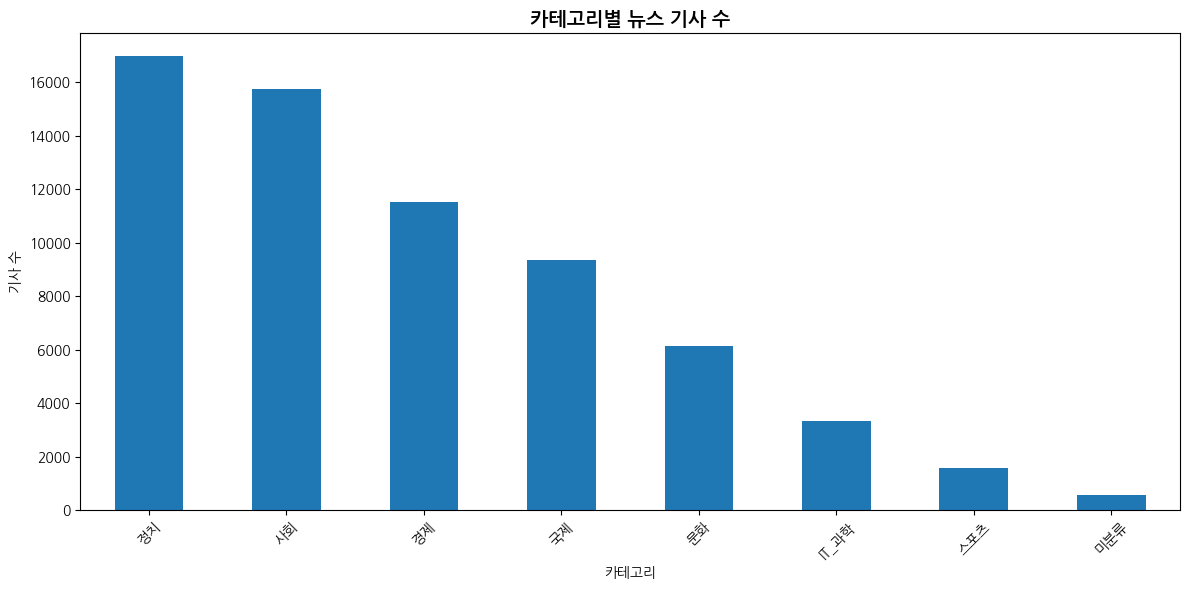

In [12]:
print("\n" + "=" * 50)
print("2. 카테고리 분석")
print("=" * 50)
print(df['카테고리'].value_counts())

# 카테고리 분포 시각화
plt.figure(figsize=(12, 6))
df['카테고리'].value_counts().plot(kind='bar')
plt.title('카테고리별 뉴스 기사 수', fontsize=14, fontweight='bold')
plt.xlabel('카테고리')
plt.ylabel('기사 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

일자 분석


3. 일자 분석
데이터 기간: 2024-10-01 00:00:00 ~ 2025-09-30 00:00:00

월별 기사 수:
월
1     4929
2     4879
3     5165
4     5502
5     5309
6     5476
7     5887
8     5491
9     5795
10    5475
11    5117
12    6244
Name: count, dtype: int64


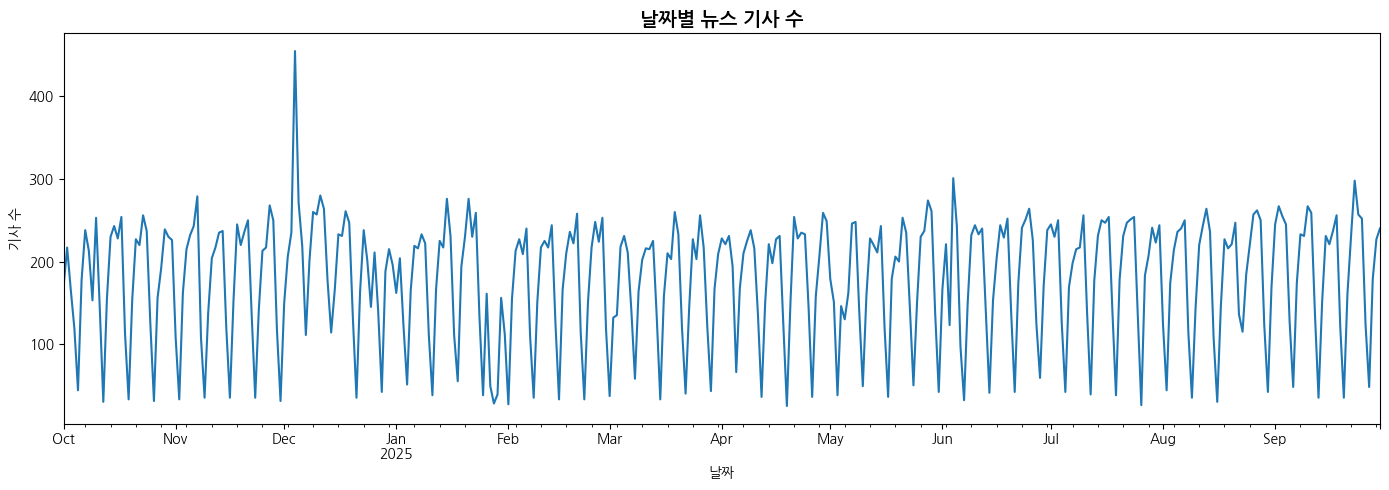

In [13]:
print("\n" + "=" * 50)
print("3. 일자 분석")
print("=" * 50)

# 일자를 datetime으로 변환
df['일자'] = pd.to_datetime(df['일자'].astype(str), format='%Y%m%d')
print(f"데이터 기간: {df['일자'].min()} ~ {df['일자'].max()}")

# 연도, 월, 일 추출
df['연도'] = df['일자'].dt.year
df['월'] = df['일자'].dt.month
df['요일'] = df['일자'].dt.day_name()

# 월별 기사 수
print(f"\n월별 기사 수:\n{df['월'].value_counts().sort_index()}")

# 시간별 추이 시각화
plt.figure(figsize=(14, 5))
df.groupby('일자').size().plot()
plt.title('날짜별 뉴스 기사 수', fontsize=14, fontweight='bold')
plt.xlabel('날짜')
plt.ylabel('기사 수')
plt.tight_layout()
plt.show()

제목 길이 분석


4. 제목 길이 분석
평균 제목 길이: 35.35자
최소 제목 길이: 3자
최대 제목 길이: 172자
중앙값: 35자


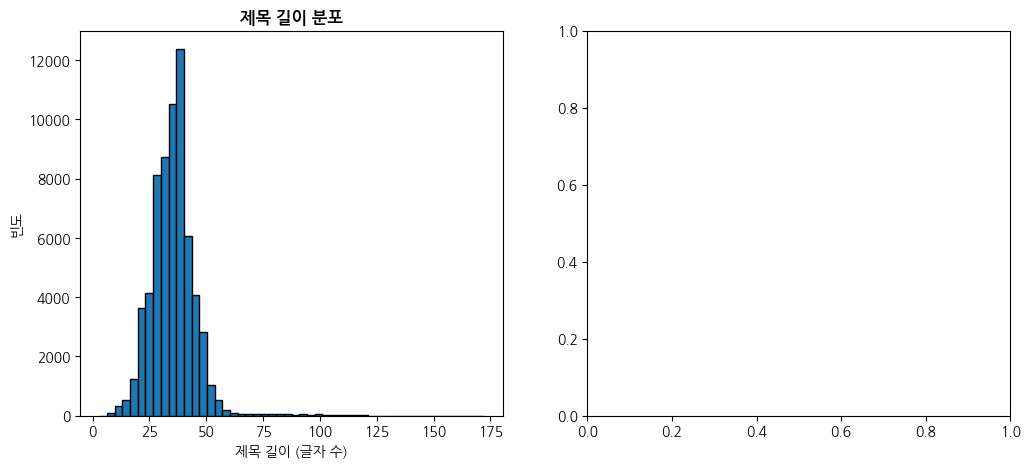

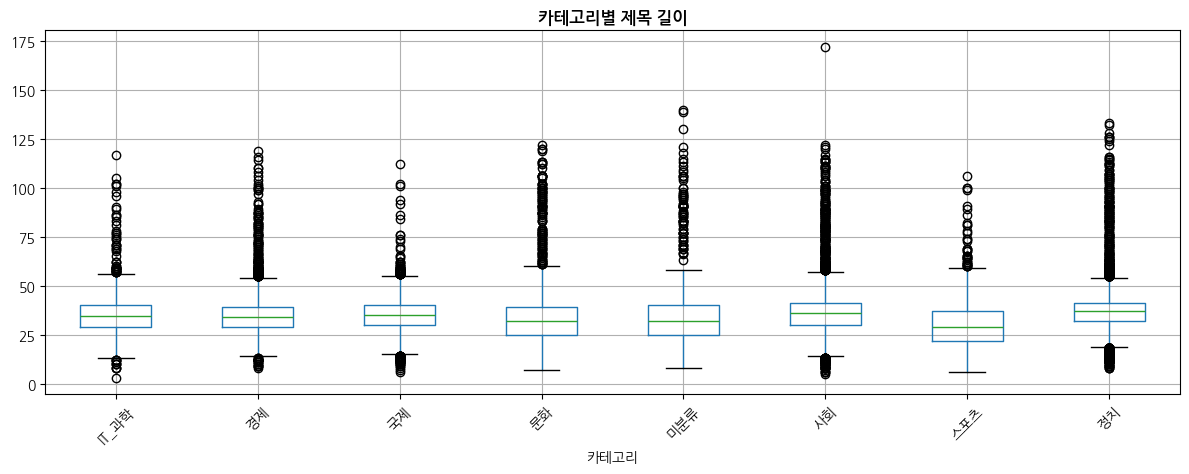

In [14]:
print("\n" + "=" * 50)
print("4. 제목 길이 분석")
print("=" * 50)

df['제목_길이'] = df['제목'].str.len()
print(f"평균 제목 길이: {df['제목_길이'].mean():.2f}자")
print(f"최소 제목 길이: {df['제목_길이'].min()}자")
print(f"최대 제목 길이: {df['제목_길이'].max()}자")
print(f"중앙값: {df['제목_길이'].median():.0f}자")

# 제목 길이 분포
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['제목_길이'], bins=50, edgecolor='black')
plt.title('제목 길이 분포', fontweight='bold')
plt.xlabel('제목 길이 (글자 수)')
plt.ylabel('빈도')

plt.subplot(1, 2, 2)
df.boxplot(column='제목_길이', by='카테고리', figsize=(12, 5))
plt.title('카테고리별 제목 길이', fontweight='bold')
plt.suptitle('')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 제목 텍스트 전처리

In [15]:
import re

In [16]:
print("\n" + "=" * 50)
print("5. 제목 텍스트 전처리")
print("=" * 50)

# 특수문자, 이모지 제거 함수
def clean_text(text):
    # 한글, 영문, 숫자, 공백만 남기기
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', ' ', text)
    # 연속된 공백 제거
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

df['제목_전처리'] = df['제목'].apply(clean_text)

# 전처리 전후 비교
print("\n전처리 전후 샘플:")
for i in range(3):
    print(f"\n원본: {df.iloc[i]['제목']}")
    print(f"전처리: {df.iloc[i]['제목_전처리']}")


5. 제목 텍스트 전처리

전처리 전후 샘플:

원본: 윤석열, 관저 앞 지지자들에 “끝까지 싸울 것” 편지 보내
전처리: 윤석열 관저 앞 지지자들에 끝까지 싸울 것 편지 보내

원본: 휴전 난항에 폭우까지 차디찬 가자의 새해
전처리: 휴전 난항에 폭우까지 차디찬 가자의 새해

원본: 미국 새해맞이 인파 향해 트럭 돌진 총기 발사 40여명 사상
전처리: 미국 새해맞이 인파 향해 트럭 돌진 총기 발사 40여명 사상


# 토큰화

BERT 기반 토큰화를 위해 WPM(WordPiece Model) 사용

1. 토크나이저 로드

In [25]:
from transformers import AutoTokenizer

# KLUE BERT 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")

# WordPiece 사용 플래그
USE_WORDPIECE = True

2. 토큰화 함수 정의 및 샘플 토큰화 테스트

In [28]:
if USE_WORDPIECE:
    def tokenize_wordpiece(text, max_length=128):
        """WordPiece 토큰화 및 BERT 입력 형식으로 인코딩"""
        encoded = tokenizer.encode_plus(
            str(text),
            add_special_tokens=True,  # [CLS], [SEP] 추가
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        tokens = tokenizer.tokenize(str(text))
        input_ids = encoded['input_ids'].squeeze().tolist()

        return {
            'tokens': tokens,
            'input_ids': input_ids,
            'attention_mask': encoded['attention_mask'].squeeze().tolist(),
            'token_count': len(tokens) + 2  # [CLS], [SEP] 포함
        }


    test_sentences = [
        "윤석열, 관저 앞 지지자들에 끝까지 싸울 것 편지 보내",
        "삼성전자 AI 반도체 NVIDIA와 경쟁 격화",
        "美 연준 금리 인상 지속 경제 침체 우려",
    ]

    for i, text in enumerate(test_sentences, 1):
        result = tokenize_wordpiece(text)
        print(f"\n테스트 {i}: {text}")
        print(f"  토큰: {result['tokens'][:15]}...")
        # 실제 BERT 입력에 사용되는 길이는 max_length입니다.
        print(f"  BERT 입력 길이: {len(result['input_ids'])} (Max Length)")
        print(f"  내용 토큰 수: {result['token_count'] - 2}") # [CLS], [SEP] 제외
        print(f"  ID 샘플: {result['input_ids'][:10]}...")

else:
    pass


테스트 1: 윤석열, 관저 앞 지지자들에 끝까지 싸울 것 편지 보내
  토큰: ['윤석', '##열', ',', '관저', '앞', '지지자', '##들', '##에', '끝', '##까', '##지', '싸울', '것', '편지', '보내']...
  BERT 입력 길이: 128 (Max Length)
  내용 토큰 수: 15
  ID 샘플: [2, 12024, 2142, 16, 21956, 1388, 11006, 2031, 2170, 711]...

테스트 2: 삼성전자 AI 반도체 NVIDIA와 경쟁 격화
  토큰: ['삼성전자', 'AI', '반도체', 'N', '##V', '##ID', '##IA', '##와', '경쟁', '격화']...
  BERT 입력 길이: 128 (Max Length)
  내용 토큰 수: 10
  ID 샘플: [2, 4798, 7212, 6425, 50, 2392, 15907, 6363, 2522, 3855]...

테스트 3: 美 연준 금리 인상 지속 경제 침체 우려
  토큰: ['美', '연준', '금리', '인상', '지속', '경제', '침체', '우려']...
  BERT 입력 길이: 128 (Max Length)
  내용 토큰 수: 8
  ID 샘플: [2, 466, 15628, 4527, 4344, 4115, 3674, 6218, 4301, 3]...


3. 전체 뉴스 데이터 토큰화

In [31]:
from tqdm import tqdm

if USE_WORDPIECE:
    MAX_LENGTH = 30
    # 30은 95% 분위수가 28개임을 고려해서 설정
    tokenize_results = []

    # df의 '제목' 컬럼 전체 토큰화
    for text in tqdm(df['제목'], desc="WordPiece 토큰화"):
        result = tokenize_wordpiece(text, max_length=MAX_LENGTH)
        tokenize_results.append(result)

    df['tokens'] = [r['tokens'] for r in tokenize_results]
    df['input_ids'] = [r['input_ids'] for r in tokenize_results]
    df['attention_mask'] = [r['attention_mask'] for r in tokenize_results]
    df['token_count'] = [r['token_count'] for r in tokenize_results]

    print("✓ WordPiece 토큰화 완료!")

else:
    pass

WordPiece 토큰화: 100%|██████████| 65269/65269 [00:35<00:00, 1828.83it/s]


✓ WordPiece 토큰화 완료!


4. 토큰 통계 분석


📊 토큰 길이 통계:
  - 평균: 19.59개
  - 중앙값: 19개
  - 최소: 3개
  - 최대: 66개


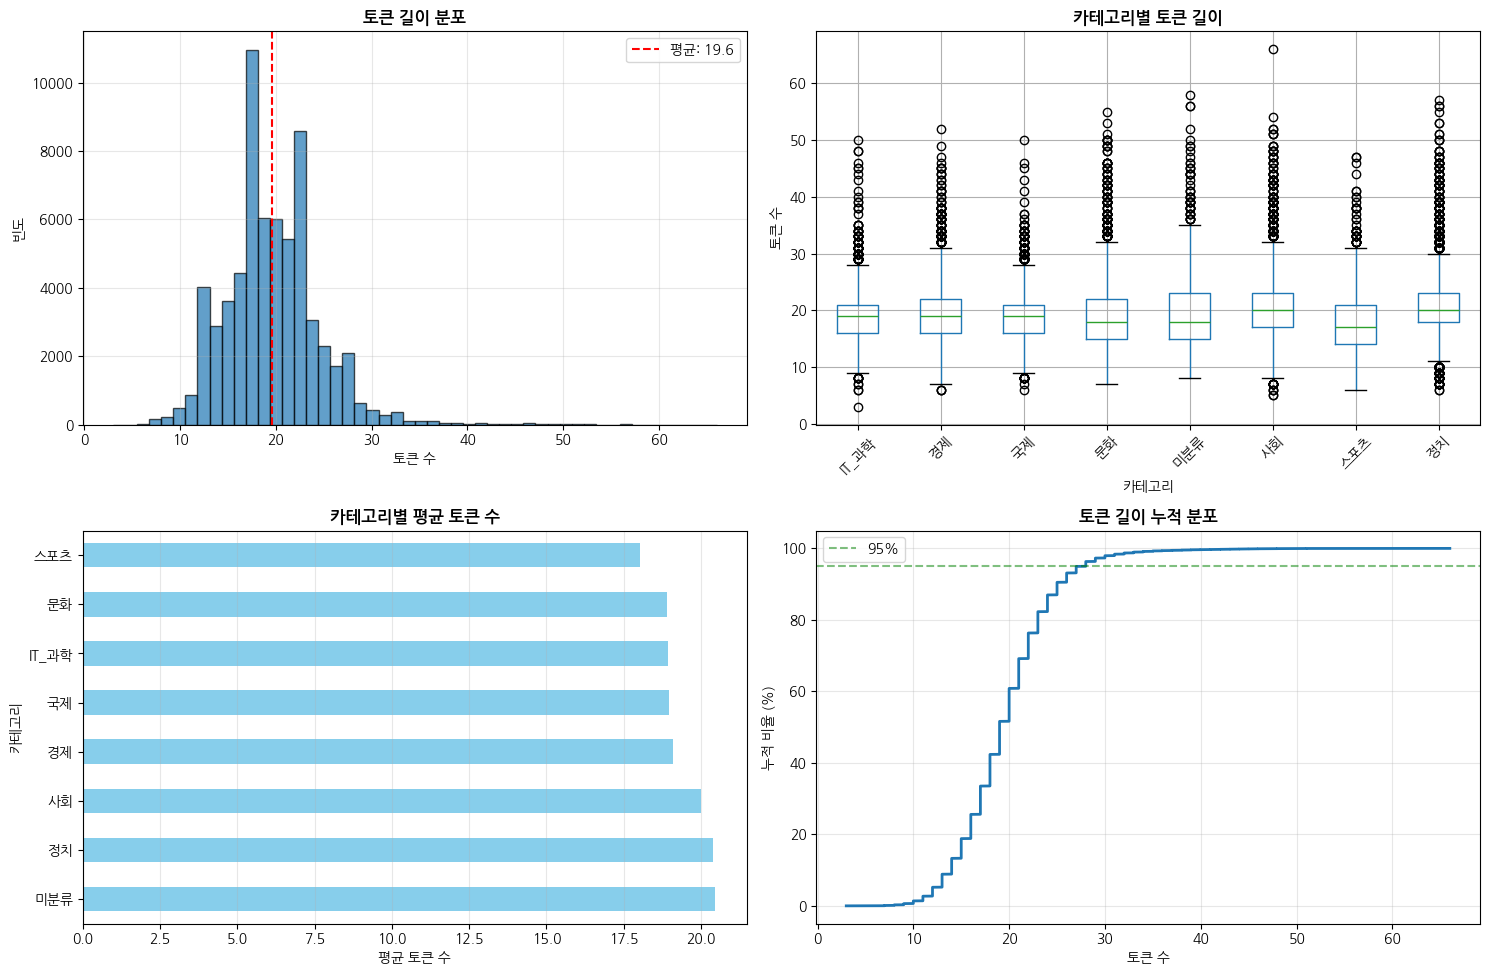


📈 토큰 길이 분위수:
  - 50%: 19개
  - 75%: 22개
  - 95%: 28개

💡 MAX_LENGTH 권장: 95% 분위수인 28개 정도를 고려하여 MAX_LENGTH를 조정하세요.


In [33]:
print("\n📊 토큰 길이 통계:")
print(f"  - 평균: {df['token_count'].mean():.2f}개")
print(f"  - 중앙값: {df['token_count'].median():.0f}개")
print(f"  - 최소: {df['token_count'].min()}개")
print(f"  - 최대: {df['token_count'].max()}개")

# 토큰 길이 분포 시각화 (4개의 플롯은 유지하여 EDA 목적 달성)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1) 토큰 길이 히스토그램
axes[0, 0].hist(df['token_count'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['token_count'].mean(), color='red', linestyle='--', label=f'평균: {df["token_count"].mean():.1f}')
axes[0, 0].set_xlabel('토큰 수'); axes[0, 0].set_ylabel('빈도')
axes[0, 0].set_title('토큰 길이 분포', fontweight='bold'); axes[0, 0].legend(); axes[0, 0].grid(alpha=0.3)

# 2) 카테고리별 토큰 길이 박스플롯
df.boxplot(column='token_count', by='카테고리', ax=axes[0, 1])
axes[0, 1].set_xlabel('카테고리'); axes[0, 1].set_ylabel('토큰 수')
axes[0, 1].set_title('카테고리별 토큰 길이', fontweight='bold'); axes[0, 1].get_figure().suptitle('')
plt.setp(axes[0, 1].xaxis.get_majorticklabels(), rotation=45)

# 3) 카테고리별 평균 토큰 수
category_token_mean = df.groupby('카테고리')['token_count'].mean().sort_values(ascending=False)
category_token_mean.plot(kind='barh', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_xlabel('평균 토큰 수'); axes[1, 0].set_ylabel('카테고리')
axes[1, 0].set_title('카테고리별 평균 토큰 수', fontweight='bold'); axes[1, 0].grid(axis='x', alpha=0.3)

# 4) 토큰 길이 누적 분포
sorted_counts = np.sort(df['token_count'])
cumulative = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts) * 100
axes[1, 1].plot(sorted_counts, cumulative, linewidth=2)
axes[1, 1].axhline(95, color='green', linestyle='--', alpha=0.5, label='95%') # 90% 제거, 95%만 유지
axes[1, 1].set_xlabel('토큰 수'); axes[1, 1].set_ylabel('누적 비율 (%)')
axes[1, 1].set_title('토큰 길이 누적 분포', fontweight='bold'); axes[1, 1].legend(); axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 분위수 정보 및 MAX_LENGTH 권장 출력
print(f"\n📈 토큰 길이 분위수:")
for percentile in [50, 75, 95]: # 90%, 99% 제거, 핵심 분위수만 유지
    value = np.percentile(df['token_count'], percentile)
    print(f"  - {percentile}%: {value:.0f}개")

# MAX_LENGTH 권장 메시지는 중요하므로 유지
P95 = np.percentile(df['token_count'], 95)
print(f"\n💡 MAX_LENGTH 권장: 95% 분위수인 {P95:.0f}개 정도를 고려하여 MAX_LENGTH를 조정하세요.")

5. 어휘 빈도 분석

토큰 수집: 100%|██████████| 65269/65269 [00:00<00:00, 502824.97it/s]



📚 어휘 통계:
  - 총 고유 토큰 수: 23,630개
  - 총 토큰 출현 수: 1,147,320개

🔝 상위 10개 빈출 토큰:
   1. ’              : 34,563회
   2. ‘              : 34,363회
   3. ,              : 30,211회
   4. “              : 24,909회
   5. ”              : 24,905회
   6. ##에            : 13,817회
   7. ]              : 12,675회
   8. [              : 12,674회
   9. ##는            : 10,056회
  10. ##의            :  9,461회


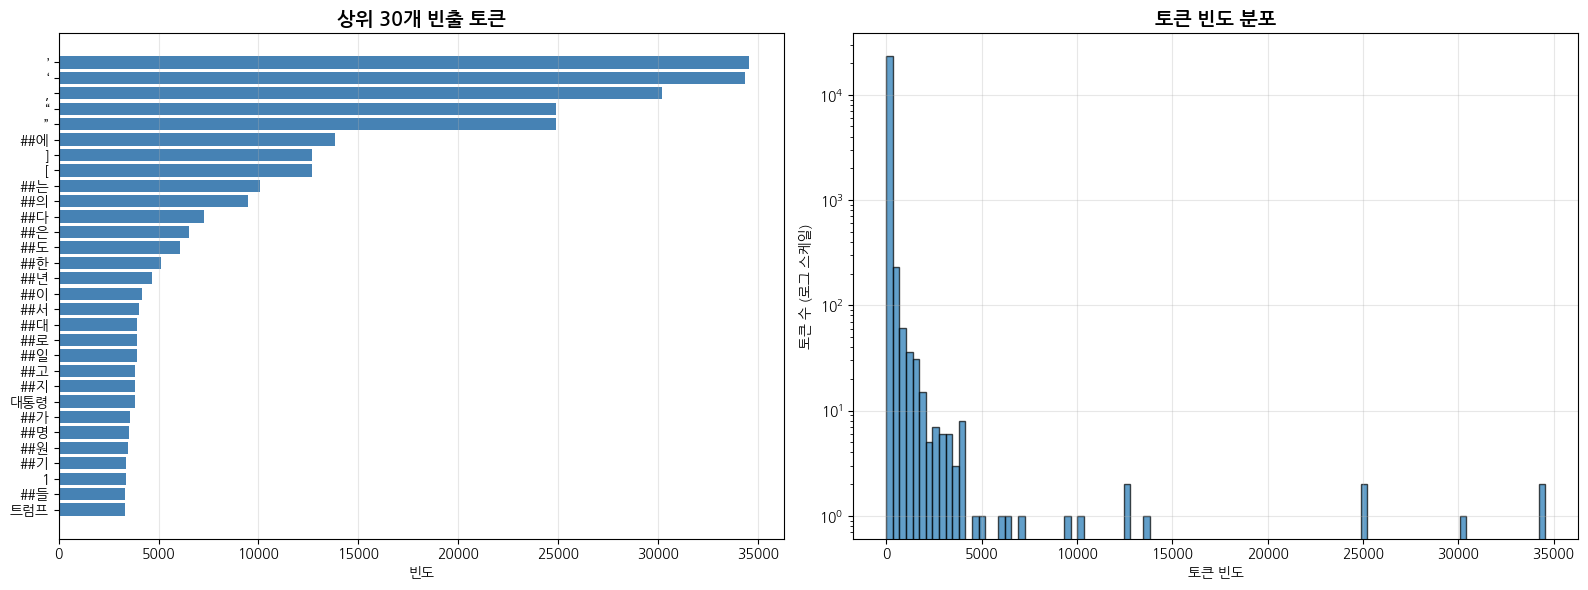

In [34]:
from collections import Counter
from tqdm import tqdm

# 모든 토큰 수집
all_tokens = []
for tokens in tqdm(df['tokens'], desc="토큰 수집"):
    if isinstance(tokens, list):
        all_tokens.extend(tokens)

# 특수 토큰 제거
if USE_WORDPIECE:
    all_tokens = [t for t in all_tokens if t not in ['[CLS]', '[SEP]', '[PAD]', '[UNK]']]

# 빈도 계산
token_freq = Counter(all_tokens)

print("\n📚 어휘 통계:")
print(f"  - 총 고유 토큰 수: {len(token_freq):,}개")
print(f"  - 총 토큰 출현 수: {len(all_tokens):,}개")

print("\n🔝 상위 10개 빈출 토큰:")
for i, (token, count) in enumerate(token_freq.most_common(10), 1): # 50개에서 10개로 출력 간소화
    print(f"  {i:2d}. {token:15s}: {count:6,}회")

# 빈도 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 상위 30개 토큰 막대 그래프
top_30_tokens = token_freq.most_common(30)
words, counts = zip(*top_30_tokens)
axes[0].barh(range(len(words)), counts, color='steelblue')
axes[0].set_yticks(range(len(words))); axes[0].set_yticklabels(words)
axes[0].invert_yaxis()
axes[0].set_xlabel('빈도'); axes[0].set_title('상위 30개 빈출 토큰', fontweight='bold', fontsize=14)
axes[0].grid(axis='x', alpha=0.3)

# 빈도 분포 (로그 스케일)
freq_values = list(token_freq.values())
axes[1].hist(freq_values, bins=100, edgecolor='black', alpha=0.7)
axes[1].set_yscale('log')
axes[1].set_xlabel('토큰 빈도'); axes[1].set_ylabel('토큰 수 (로그 스케일)')
axes[1].set_title('토큰 빈도 분포', fontweight='bold', fontsize=14)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

6. 카테고리별 주요 토큰

In [35]:
from collections import Counter
from tqdm import tqdm

print("\n📰 카테고리별 주요 토큰 분석")

category_tokens = {}

# 모든 카테고리에 대해 반복
for category in tqdm(df['카테고리'].unique(), desc="카테고리별 토큰 집계"):
    cat_data = df[df['카테고리'] == category]
    cat_tokens = []

    # 해당 카테고리 제목의 모든 토큰 수집
    for tokens in cat_data['tokens']:
        if isinstance(tokens, list):
            cat_tokens.extend(tokens)

    # 특수 토큰 제거
    if USE_WORDPIECE:
        cat_tokens = [t for t in cat_tokens if t not in ['[CLS]', '[SEP]', '[PAD]', '[UNK]']]

    category_tokens[category] = Counter(cat_tokens)

# 각 카테고리별 상위 15개 토큰 출력
for category, token_counter in category_tokens.items():
    print(f"\n[{category}] 상위 15개 토큰:")

    # 간결한 출력 형식 유지
    for i, (token, count) in enumerate(token_counter.most_common(15), 1):
        print(f"  {i:2d}. {token:15s}: {count:5,}회")


📰 카테고리별 주요 토큰 분석


카테고리별 토큰 집계: 100%|██████████| 8/8 [00:01<00:00,  6.59it/s]


[정치] 상위 15개 토큰:
   1. “              : 9,852회
   2. ”              : 9,850회
   3. ,              : 8,847회
   4. ’              : 8,184회
   5. ‘              : 8,146회
   6. [              : 3,673회
   7. ]              : 3,673회
   8. ##에            : 3,636회
   9. 대통령            : 3,014회
  10. ##의            : 2,736회
  11. ##는            : 2,539회
  12. ##은            : 1,895회
  13. ##열            : 1,866회
  14. 윤석             : 1,818회
  15. ##다            : 1,715회

[국제] 상위 15개 토큰:
   1. ,              : 4,720회
   2. ’              : 4,495회
   3. ‘              : 4,483회
   4. “              : 4,354회
   5. ”              : 4,352회
   6. ##에            : 2,564회
   7. 트럼프            : 2,298회
   8. ##는            : 1,364회
   9. [              : 1,358회
  10. ]              : 1,358회
  11. ##의            : 1,133회
  12. 미              : 1,024회
  13. 미국             :   912회
  14. ##다            :   886회
  15. 중국             :   878회

[문화] 상위 15개 토큰:
   1. ’              : 3,289회
   2. ‘            

7. 모델 학습을 위한 데이터 준비 및 저장

In [36]:
from sklearn.preprocessing import LabelEncoder
import pickle

if USE_WORDPIECE:
    # 레이블 인코딩
    label_encoder = LabelEncoder()
    df['label'] = label_encoder.fit_transform(df['카테고리'])

    print("\n✓ 레이블 인코딩 완료")
    print(f"레이블 매핑: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

    # 샘플 데이터 확인
    print("\n📦 샘플 데이터 (BERT 입력 형태):")
    print(f"  제목: {df.iloc[0]['제목']}")
    print(f"  레이블: {df.iloc[0]['카테고리']} ({df.iloc[0]['label']})")
    print(f"  Input IDs 길이: {len(df['input_ids'][0])} (Max Length)")



✓ 레이블 인코딩 완료
레이블 매핑: {'IT_과학': np.int64(0), '경제': np.int64(1), '국제': np.int64(2), '문화': np.int64(3), '미분류': np.int64(4), '사회': np.int64(5), '스포츠': np.int64(6), '정치': np.int64(7)}

📦 샘플 데이터 (BERT 입력 형태):
  제목: 윤석열, 관저 앞 지지자들에 “끝까지 싸울 것” 편지 보내
  레이블: 정치 (7)
  Input IDs 길이: 30 (Max Length)


In [37]:
# CSV 저장을 위해 리스트 컬럼을 문자열로 변환
df['tokens_str'] = df['tokens'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

if USE_WORDPIECE:
    df['input_ids_str'] = df['input_ids'].apply(lambda x: ','.join(map(str, x)))
    df['attention_mask_str'] = df['attention_mask'].apply(lambda x: ','.join(map(str, x)))
    save_columns = ['일자', '제목', '카테고리', 'token_count', 'tokens_str', 'label', 'input_ids_str', 'attention_mask_str']
else:
    save_columns = ['일자', '제목', '카테고리', 'token_count', 'tokens_str']

# CSV 저장
output_file = 'news_wordpiece_tokenized.csv'
df[save_columns].to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"✓ CSV 저장 완료: {output_file}")

# Pickle 파일 저장 (리스트 형태 유지)
pickle_file = 'news_wordpiece_tokenized.pkl'
with open(pickle_file, 'wb') as f:
    pickle.dump(df, f)
print(f"✓ Pickle 파일 저장 완료: {pickle_file}")

✓ CSV 저장 완료: news_wordpiece_tokenized.csv
✓ Pickle 파일 저장 완료: news_wordpiece_tokenized.pkl


요약 리포트

In [38]:
print("\n" + "=" * 60)
print("📋 전처리 완료 요약")
print("=" * 60)
print(f"\n데이터 정보:")
print(f"  - 전체 기사 수: {len(df):,}개") # df로 수정
print(f"  - 카테고리 수: {df['카테고리'].nunique()}개") # df로 수정
print(f"  - 기간: {df['일자'].min()} ~ {df['일자'].max()}") # df로 수정

print(f"\n토큰화 정보:")
if USE_WORDPIECE:
    print(f"  - 토크나이저: KLUE BERT WordPiece")
    print(f"  - 어휘 크기: {len(tokenizer):,}개")
else:
    print(f"  - 토크나이저: 형태소 분석기/공백 기반")

print(f"  - 평균 토큰 수: {df['token_count'].mean():.2f}개") # df로 수정
print(f"  - 고유 토큰 수: {len(token_freq):,}개")

print(f"\n저장 파일:")
print(f"  - CSV: {output_file}")
print(f"  - Pickle: {pickle_file}")

print("\n✨ 모든 전처리가 완료되었습니다! 이제 BERT 모델을 훈련할 준비가 되었습니다.")
print("=" * 60)


📋 전처리 완료 요약

데이터 정보:
  - 전체 기사 수: 65,269개
  - 카테고리 수: 8개
  - 기간: 2024-10-01 00:00:00 ~ 2025-09-30 00:00:00

토큰화 정보:
  - 토크나이저: KLUE BERT WordPiece
  - 어휘 크기: 32,000개
  - 평균 토큰 수: 19.59개
  - 고유 토큰 수: 23,630개

저장 파일:
  - CSV: news_wordpiece_tokenized.csv
  - Pickle: news_wordpiece_tokenized.pkl

✨ 모든 전처리가 완료되었습니다! 이제 BERT 모델을 훈련할 준비가 되었습니다.
